<a href="https://colab.research.google.com/github/CDN2024/Pessoal/blob/main/Banco_de_Dados1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vamos começar com o código para organizar e visualizar os dados de maneira útil:

In [42]:
import pandas as pd


# URL do arquivo CSV
url = ('https://github.com/CDN2024/Pessoal/raw/refs/heads/main/Banc.Dados%20CSV.csv')



# Carregar o dataset especificando o delimitador
df = pd.read_csv(url, sep=';', encoding='ISO-8859-1')


# Exibir as primeiras linhas do dataset
print(df.head())

     Ordem  Operação Chave de controle Centro de trabalho  \
0  1945104        51              ZP26           12234393   
1  1945104        15               NaN           LB-TXT01   
2  1945104        20              ZP04           12227172   
3  1945104        25              ZP05           LB-TXT01   
4  1945104        30              ZP04           85080319   

                       Txt.breve operação Quantidade operação (MEINH)  \
0                 APONTAMENTO WASTE - SFC                       1.608   
1  ENVIAR PEÇAS P/ USINAGEM LUK - ALA1 FB                       1.608   
2                            BROCHAR BR/3                       1.608   
3            ENVIAR PEÇAS P/ INA - ALA 08                       1.608   
4                      TRATAMENTO TÉRMICO                       1.608   

  Qtd.boa confirmada (MEINH) Refugo confirmado (MEINH)  \
0                          0                        83   
1                          0                         0   
2                   

##Etapa 1: Verificar as colunas relevantes
*Primeiro, vamos inspecionar as colunas para garantir que temos as informações necessárias.*

In [40]:
# Exibir as colunas do dataset

print(df.columns)



Index(['Ordem', 'Operação', 'Chave de controle', 'Centro de trabalho',
       'Txt.breve operação', 'Quantidade operação (MEINH)',
       'Qtd.boa confirmada (MEINH)', 'Refugo confirmado (MEINH)',
       'Confirmação atividade 2 (ILE02)', 'Data início real de execução',
       'Data fim real da execução'],
      dtype='object')


In [33]:
# Converter as colunas de data para o formato datetime
df['Data início real de execução'] = pd.to_datetime(df['Data início real de execução'], errors='coerce')
df['Data fim real da execução'] = pd.to_datetime(df['Data fim real da execução'], errors='coerce')

# Verificar as mudanças
print(df[['Data início real de execução', 'Data fim real da execução']].head())


  Data início real de execução Data fim real da execução
0                   2024-10-29                2024-10-29
1                          NaT                       NaT
2                   2023-10-13                2024-10-29
3                          NaT                       NaT
4                   2023-10-13                2024-10-29


<ipython-input-33-cab71d24e1f1>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data início real de execução'] = pd.to_datetime(df['Data início real de execução'], errors='coerce')
<ipython-input-33-cab71d24e1f1>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data fim real da execução'] = pd.to_datetime(df['Data fim real da execução'], errors='coerce')


## Etapa 3: Organizar os dados por centro de trabalho
*Agora, podemos agrupar os dados por centro de trabalho e data de execução e somar as quantidades confirmadas.*

In [34]:
# Agrupar os dados por centro de trabalho e data de execução
df_grouped = df.groupby(['Centro de trabalho', 'Data início real de execução', 'Data fim real da execução']).agg({'Qtd.boa confirmada (MEINH)': 'sum'}).reset_index()

# Exibir as primeiras linhas do dataframe agrupado
print(df_grouped.head())

  Centro de trabalho Data início real de execução Data fim real da execução  \
0           12204765                   2024-03-22                2024-03-22   
1           12227172                   2023-10-13                2024-10-29   
2           12227172                   2023-11-29                2023-11-29   
3           12227172                   2023-12-04                2024-03-28   
4           12227172                   2023-12-21                2024-04-30   

  Qtd.boa confirmada (MEINH)  
0                          0  
1                      1.711  
2                      6.671  
3                      8.620  
4                      2.137  


##Etapa 4: Tratar valores ausentes ou inconsistentes
Se houver valores ausentes ou inconsistentes nas colunas-chave, podemos tratar essas inconsistências, removendo ou preenchendo com valores adequados.

In [35]:
# Verificar valores ausentes
print(df_grouped.isnull().sum())

# Remover ou preencher valores ausentes
# Exemplo: Remover linhas com dados ausentes
df_grouped.dropna(subset=['Centro de trabalho', 'Qtd.boa confirmada (MEINH)', 'Data início real de execução', 'Data fim real da execução'], inplace=True)

# Exibir novamente o dataframe limpo
print(df_grouped.head())

Centro de trabalho              0
Data início real de execução    0
Data fim real da execução       0
Qtd.boa confirmada (MEINH)      0
dtype: int64
  Centro de trabalho Data início real de execução Data fim real da execução  \
0           12204765                   2024-03-22                2024-03-22   
1           12227172                   2023-10-13                2024-10-29   
2           12227172                   2023-11-29                2023-11-29   
3           12227172                   2023-12-04                2024-03-28   
4           12227172                   2023-12-21                2024-04-30   

  Qtd.boa confirmada (MEINH)  
0                          0  
1                      1.711  
2                      6.671  
3                      8.620  
4                      2.137  


##Etapa 5: Análise adicional (opcional)
Agora que os dados estão organizados, você pode realizar análises adicionais, como filtrar ordens por período ou centro de trabalho, calcular totais ou médias, ou até mesmo visualizar os dados.

Exemplo de filtro por data (ordens entre duas datas):

In [21]:
# Filtrar ordens entre duas datas (por exemplo, entre 01/01/2024 e 31/05/2024)
data_inicio = pd.to_datetime('2024-01-01')
data_fim = pd.to_datetime('2024-05-31')

df_filtered = df_grouped[(df_grouped['Data início real de execução'] >= data_inicio) & (df_grouped['Data fim real da execução'] <= data_fim)]

# Exibir resultados filtrados
print(df_filtered.head())

   Centro de trabalho Data início real de execução Data fim real da execução  \
0            12204765                   2024-03-22                2024-03-22   
5            12227172                   2024-01-12                2024-01-19   
6            12227172                   2024-02-22                2024-04-07   
7            12227172                   2024-03-12                2024-04-30   
13           12232765                   2024-01-12                2024-01-19   

   Qtd.boa confirmada (MEINH)  
0                           0  
5                       2.317  
6                       6.900  
7                       5.046  
13                      2.317  


In [49]:
import pandas as pd

# Converter a coluna 'Qtd.boa confirmada (MEINH)' para numérico
df['Qtd.boa confirmada (MEINH)'] = pd.to_numeric(df['Qtd.boa confirmada (MEINH)'], errors='coerce')

# Filtrar os dados para os centros de trabalho 'IB-ENV01' e 'IB008838'
df_filtered = df[
    (df['Centro de trabalho'].isin(['IB-ENV01', 'IB008838'])) &  # Filtrar pelos centros de trabalho
    (df['Qtd.boa confirmada (MEINH)'] > 0) &  # Filtrar pela quantidade confirmada maior que 0
    (df['Data início real de execução'] >= '2024-01-01') &  # Data início maior ou igual à data de início
    (df['Data fim real da execução'] <= '2024-05-31')  # Data fim menor ou igual à data de fim
]

# Agrupar os dados pela 'Ordem' e agregar as informações
df_grouped_by_ordem = df_filtered.groupby('Ordem').agg(
    {
        'Qtd.boa confirmada (MEINH)': 'sum',  # Soma das quantidades confirmadas para cada ordem
        'Data início real de execução': 'min',  # Data mínima de início de execução
        'Data fim real da execução': 'max',  # Data máxima de fim de execução
        'Centro de trabalho': 'first'  # Seleciona o primeiro centro de trabalho para cada ordem
    }
).reset_index()

# Exibir os resultados agrupados
print(df_grouped_by_ordem)


      Ordem  Qtd.boa confirmada (MEINH) Data início real de execução  \
0   2165927                       6.016                   30/11/2023   
1   2165931                       7.529                   30/11/2023   
2   2252998                       4.274                   22/12/2023   
3   2400093                      16.518                   29/01/2024   
4   2400098                       2.518                   31/01/2024   
5   2400100                       3.972                   31/01/2024   
6   2400190                       6.771                   30/01/2024   
7   2406903                      36.346                   30/01/2024   
8   2410770                      11.324                   25/01/2024   
9   2452133                       4.000                   31/01/2024   
10  2452138                      40.000                   30/01/2024   
11  2576178                      10.012                   26/03/2024   
12  2600067                      11.714                   21/03/

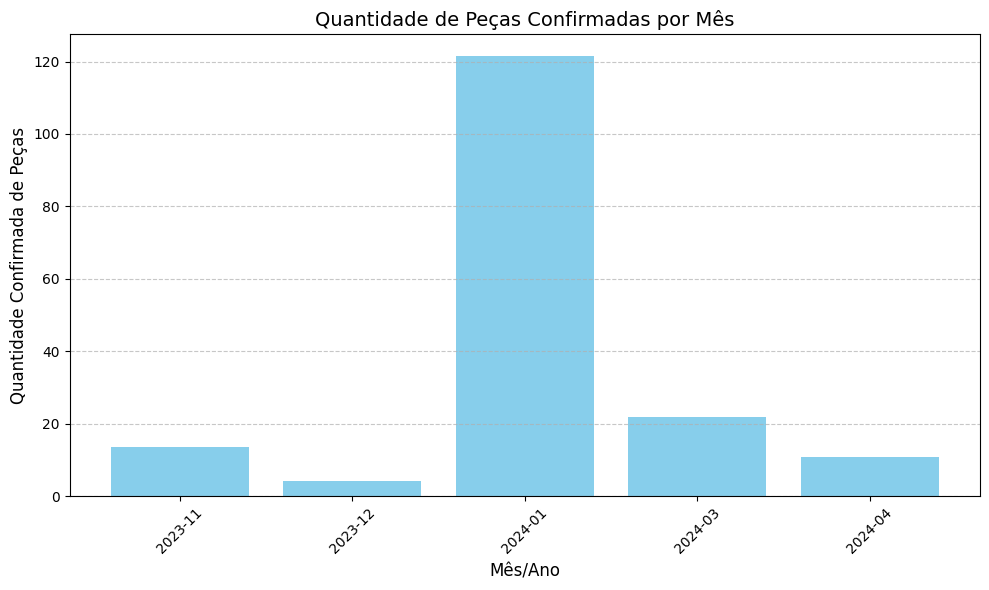

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Garantir que as colunas de data estejam no formato de datetime com dayfirst=True
df_grouped_by_ordem['Data início real de execução'] = pd.to_datetime(df_grouped_by_ordem['Data início real de execução'], dayfirst=True)

# Extrair o mês e o ano da data de início real de execução
df_grouped_by_ordem['Mês/Ano'] = df_grouped_by_ordem['Data início real de execução'].dt.to_period('M')

# Agrupar os dados por Mês/Ano e somar a quantidade confirmada de peças
df_monthly = df_grouped_by_ordem.groupby('Mês/Ano')['Qtd.boa confirmada (MEINH)'].sum().reset_index()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_monthly['Mês/Ano'].astype(str), df_monthly['Qtd.boa confirmada (MEINH)'], color='skyblue')

# Adicionar título e rótulos
plt.title('Quantidade de Peças Confirmadas por Mês', fontsize=14)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Quantidade Confirmada de Peças', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()  # Ajustar o layout para não cortar os rótulos
plt.show()

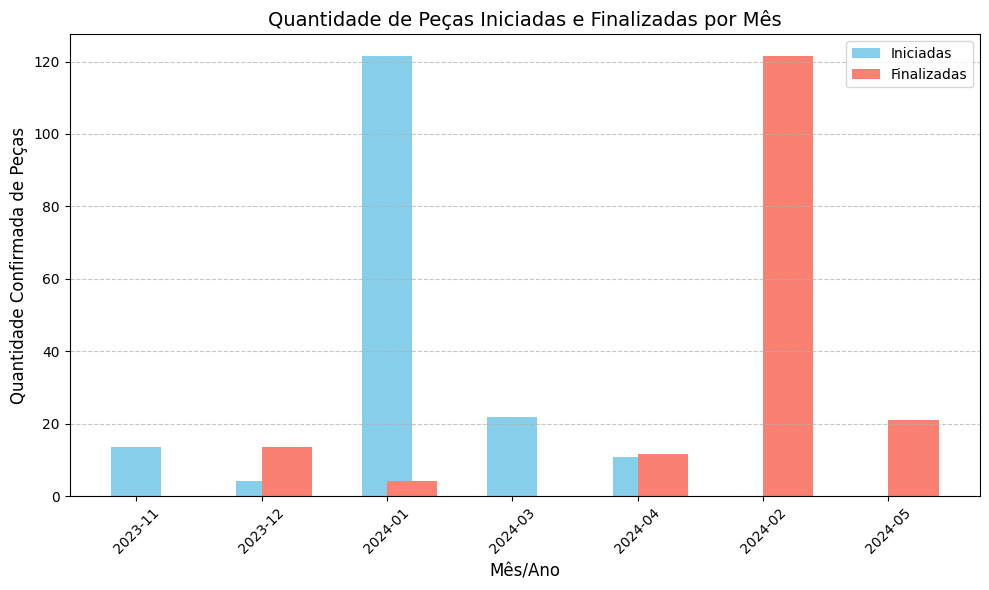

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Garantir que as colunas de data estejam no formato de datetime com dayfirst=True
df_grouped_by_ordem['Data início real de execução'] = pd.to_datetime(df_grouped_by_ordem['Data início real de execução'], dayfirst=True)
df_grouped_by_ordem['Data fim real da execução'] = pd.to_datetime(df_grouped_by_ordem['Data fim real da execução'], dayfirst=True)

# Extrair o mês e o ano das datas de início e fim
df_grouped_by_ordem['Mês/Ano Início'] = df_grouped_by_ordem['Data início real de execução'].dt.to_period('M')
df_grouped_by_ordem['Mês/Ano Fim'] = df_grouped_by_ordem['Data fim real da execução'].dt.to_period('M')

# Agrupar os dados por Mês/Ano Início e Mês/Ano Fim e somar a quantidade confirmada de peças
df_iniciadas = df_grouped_by_ordem.groupby('Mês/Ano Início')['Qtd.boa confirmada (MEINH)'].sum().reset_index()
df_finalizadas = df_grouped_by_ordem.groupby('Mês/Ano Fim')['Qtd.boa confirmada (MEINH)'].sum().reset_index()

# Ajustar o gráfico para que ambos os grupos apareçam no mesmo gráfico
plt.figure(figsize=(10, 6))

# Plotar as barras para as peças iniciadas
plt.bar(df_iniciadas['Mês/Ano Início'].astype(str), df_iniciadas['Qtd.boa confirmada (MEINH)'], width=0.4, label='Iniciadas', color='skyblue', align='center')

# Plotar as barras para as peças finalizadas
plt.bar(df_finalizadas['Mês/Ano Fim'].astype(str), df_finalizadas['Qtd.boa confirmada (MEINH)'], width=0.4, label='Finalizadas', color='salmon', align='edge')

# Adicionar título e rótulos
plt.title('Quantidade de Peças Iniciadas e Finalizadas por Mês', fontsize=14)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Quantidade Confirmada de Peças', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# Adicionar uma grade e exibir o gráfico
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar o layout para não cortar os rótulos
plt.show()

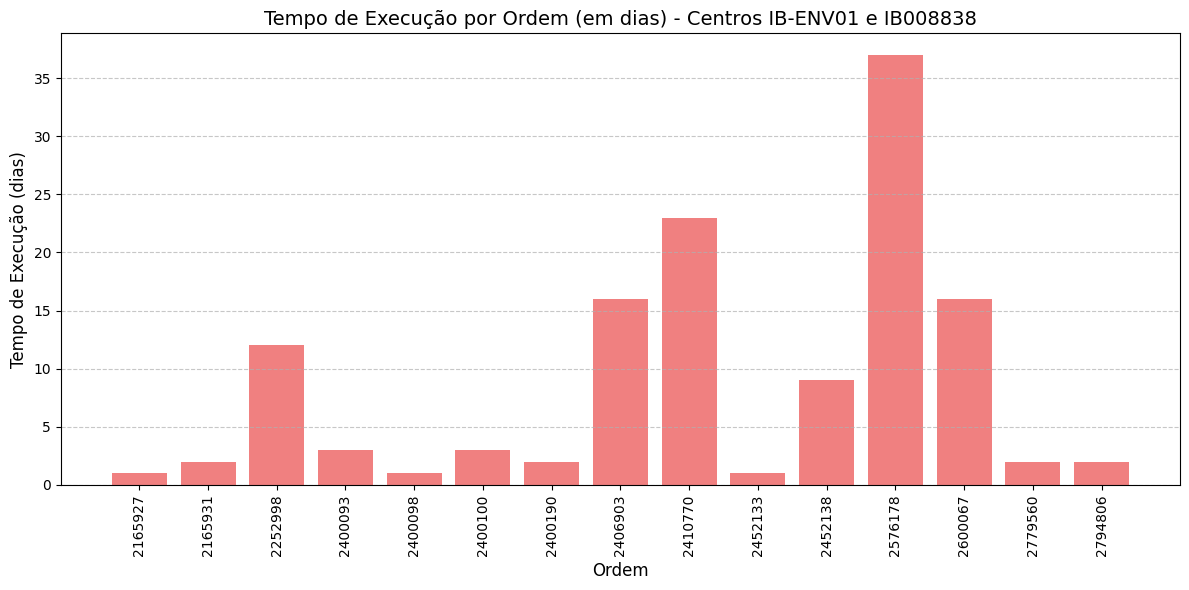

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Garantir que as colunas de data estejam no formato de datetime com dayfirst=True
df_grouped_by_ordem['Data início real de execução'] = pd.to_datetime(df_grouped_by_ordem['Data início real de execução'], dayfirst=True)
df_grouped_by_ordem['Data fim real da execução'] = pd.to_datetime(df_grouped_by_ordem['Data fim real da execução'], dayfirst=True)

# Filtrar os dados para os centros de trabalho 'IB-ENV01' e 'IB008838'
df_filtered = df_grouped_by_ordem[df_grouped_by_ordem['Centro de trabalho'].isin(['IB-ENV01', 'IB008838'])]

# Calcular o tempo de execução (diferença entre a data de início e a data de fim)
df_filtered['Tempo de Execução (dias)'] = (df_filtered['Data fim real da execução'] - df_filtered['Data início real de execução']).dt.days

# Plotar o gráfico de tempo de execução por ordem
plt.figure(figsize=(12, 6))

# Plotar uma barra para cada ordem
plt.bar(df_filtered['Ordem'].astype(str), df_filtered['Tempo de Execução (dias)'], color='lightcoral')

# Adicionar título e rótulos
plt.title('Tempo de Execução por Ordem (em dias) - Centros IB-ENV01 e IB008838', fontsize=14)
plt.xlabel('Ordem', fontsize=12)
plt.ylabel('Tempo de Execução (dias)', fontsize=12)
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo X para facilitar a leitura

# Adicionar uma grade para o eixo Y
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar o layout para não cortar os rótulos
plt.tight_layout()

# Exibir o gráfico
plt.show()

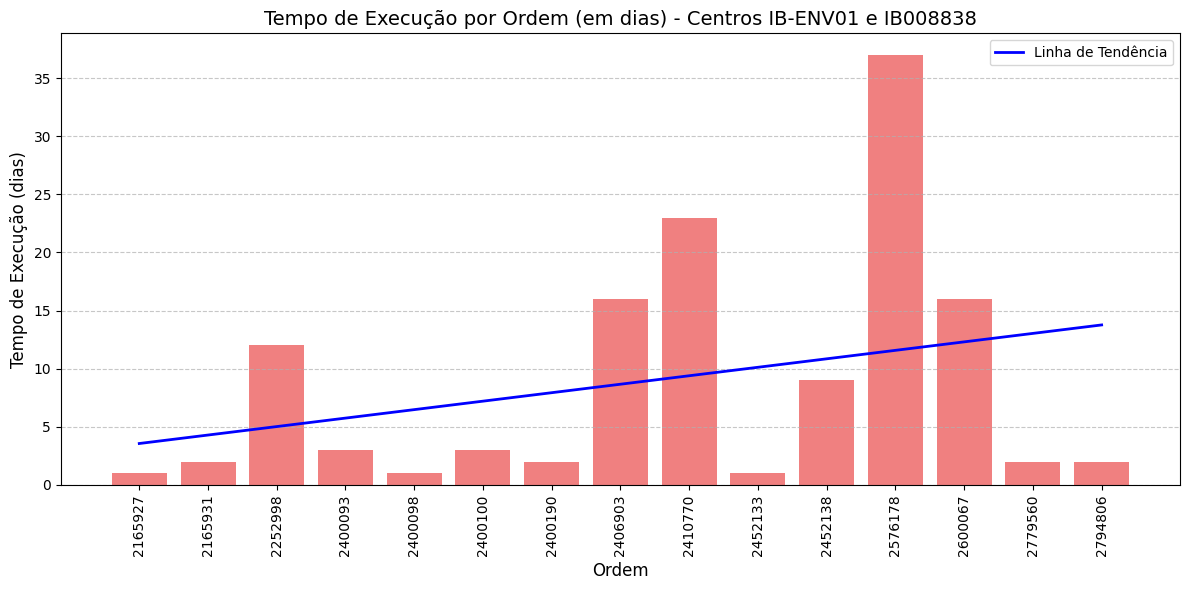

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Garantir que as colunas de data estejam no formato de datetime com dayfirst=True
df_grouped_by_ordem['Data início real de execução'] = pd.to_datetime(df_grouped_by_ordem['Data início real de execução'], dayfirst=True)
df_grouped_by_ordem['Data fim real da execução'] = pd.to_datetime(df_grouped_by_ordem['Data fim real da execução'], dayfirst=True)

# Filtrar os dados para os centros de trabalho 'IB-ENV01' e 'IB008838'
df_filtered = df_grouped_by_ordem[df_grouped_by_ordem['Centro de trabalho'].isin(['IB-ENV01', 'IB008838'])]

# Calcular o tempo de execução (diferença entre a data de início e a data de fim)
df_filtered['Tempo de Execução (dias)'] = (df_filtered['Data fim real da execução'] - df_filtered['Data início real de execução']).dt.days

# Ordenar os dados pela ordem para facilitar a visualização
df_filtered = df_filtered.sort_values('Ordem')

# Plotar o gráfico de tempo de execução por ordem
plt.figure(figsize=(12, 6))

# Plotar uma barra para cada ordem
plt.bar(df_filtered['Ordem'].astype(str), df_filtered['Tempo de Execução (dias)'], color='lightcoral')

# Adicionar título e rótulos
plt.title('Tempo de Execução por Ordem (em dias) - Centros IB-ENV01 e IB008838', fontsize=14)
plt.xlabel('Ordem', fontsize=12)
plt.ylabel('Tempo de Execução (dias)', fontsize=12)
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo X para facilitar a leitura

# Calcular a linha de tendência (regressão linear)
x_values = np.arange(len(df_filtered))  # Índices das ordens
y_values = df_filtered['Tempo de Execução (dias)'].values

# Usar a regressão linear para calcular a linha de tendência
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calcular os valores da linha de tendência
trend_line = slope * x_values + intercept

# Plotar a linha de tendência
plt.plot(df_filtered['Ordem'].astype(str), trend_line, color='blue', label='Linha de Tendência', linewidth=2)

# Adicionar legenda
plt.legend()

# Adicionar uma grade para o eixo Y
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar o layout para não cortar os rótulos
plt.tight_layout()

# Exibir o gráfico
plt.show()


<ipython-input-57-b0f3bd42a256>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_monthly['Ano-Mês'].astype(str), rotation=45)


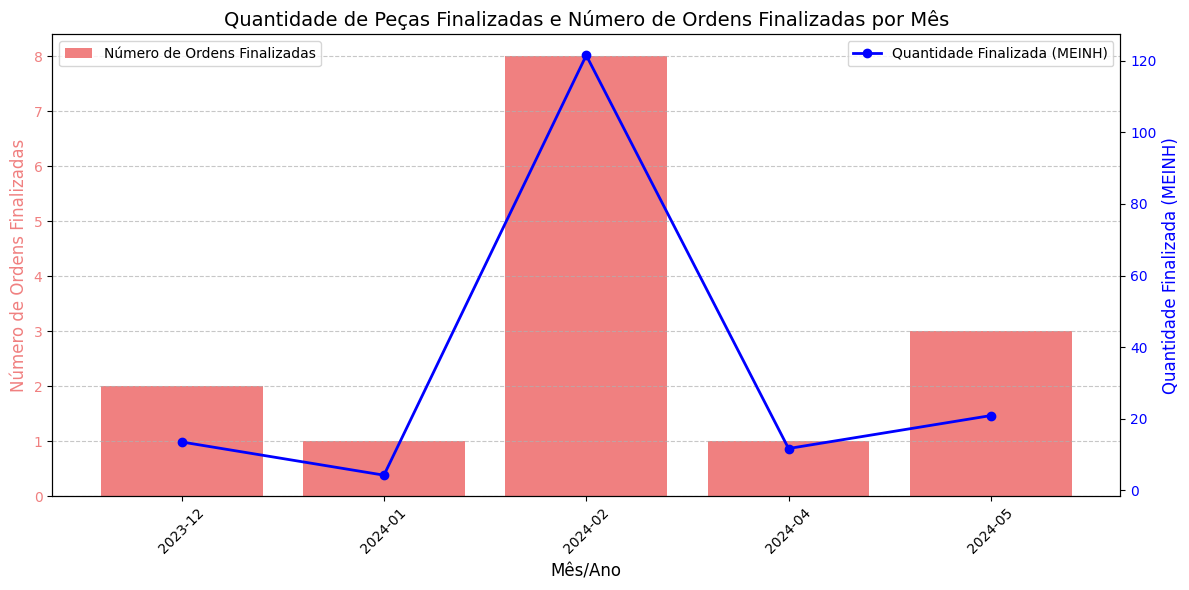

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que as colunas de data estejam no formato de datetime com dayfirst=True
df_grouped_by_ordem['Data fim real da execução'] = pd.to_datetime(df_grouped_by_ordem['Data fim real da execução'], dayfirst=True)

# Filtrar os dados para os centros de trabalho 'IB-ENV01' e 'IB008838'
df_filtered = df_grouped_by_ordem[df_grouped_by_ordem['Centro de trabalho'].isin(['IB-ENV01', 'IB008838'])]

# Extrair o mês e o ano da coluna de data de término
df_filtered['Ano-Mês'] = df_filtered['Data fim real da execução'].dt.to_period('M')

# Agrupar os dados por 'Ano-Mês' e somar as quantidades e contar as ordens
df_monthly = df_filtered.groupby('Ano-Mês').agg(
    {
        'Qtd.boa confirmada (MEINH)': 'sum',  # Soma da quantidade de peças finalizadas por mês
        'Ordem': 'count'  # Contar o número de ordens finalizadas por mês
    }).reset_index()

# Renomear as colunas para melhor compreensão
df_monthly.columns = ['Ano-Mês', 'Quantidade Finalizada (MEINH)', 'Número de Ordens Finalizadas']

# Plotar os gráficos de quantidade finalizada e número de ordens finalizadas por mês
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar o número de ordens finalizadas no eixo Y da esquerda
ax1.bar(df_monthly['Ano-Mês'].astype(str), df_monthly['Número de Ordens Finalizadas'], color='lightcoral', label='Número de Ordens Finalizadas')
ax1.set_xlabel('Mês/Ano', fontsize=12)
ax1.set_ylabel('Número de Ordens Finalizadas', fontsize=12, color='lightcoral')
ax1.tick_params(axis='y', labelcolor='lightcoral')
ax1.set_xticklabels(df_monthly['Ano-Mês'].astype(str), rotation=45)

# Criar um eixo Y secundário para a quantidade finalizada
ax2 = ax1.twinx()
ax2.plot(df_monthly['Ano-Mês'].astype(str), df_monthly['Quantidade Finalizada (MEINH)'], color='blue', marker='o', label='Quantidade Finalizada (MEINH)', linewidth=2)
ax2.set_ylabel('Quantidade Finalizada (MEINH)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Adicionar um título e uma legenda
plt.title('Quantidade de Peças Finalizadas e Número de Ordens Finalizadas por Mês', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adicionar uma grade para o eixo Y primário
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ajustar o layout para não cortar os rótulos
plt.tight_layout()

# Exibir o gráfico
plt.show()
